In [13]:
# import necessary modules
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Pre-Processing

In [15]:
# drop unnecessary feature

df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [16]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df['Geography'].replace({'France':0,'Spain':1,'Germany':2},inplace=True)

In [17]:
df.shape

(10000, 11)

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


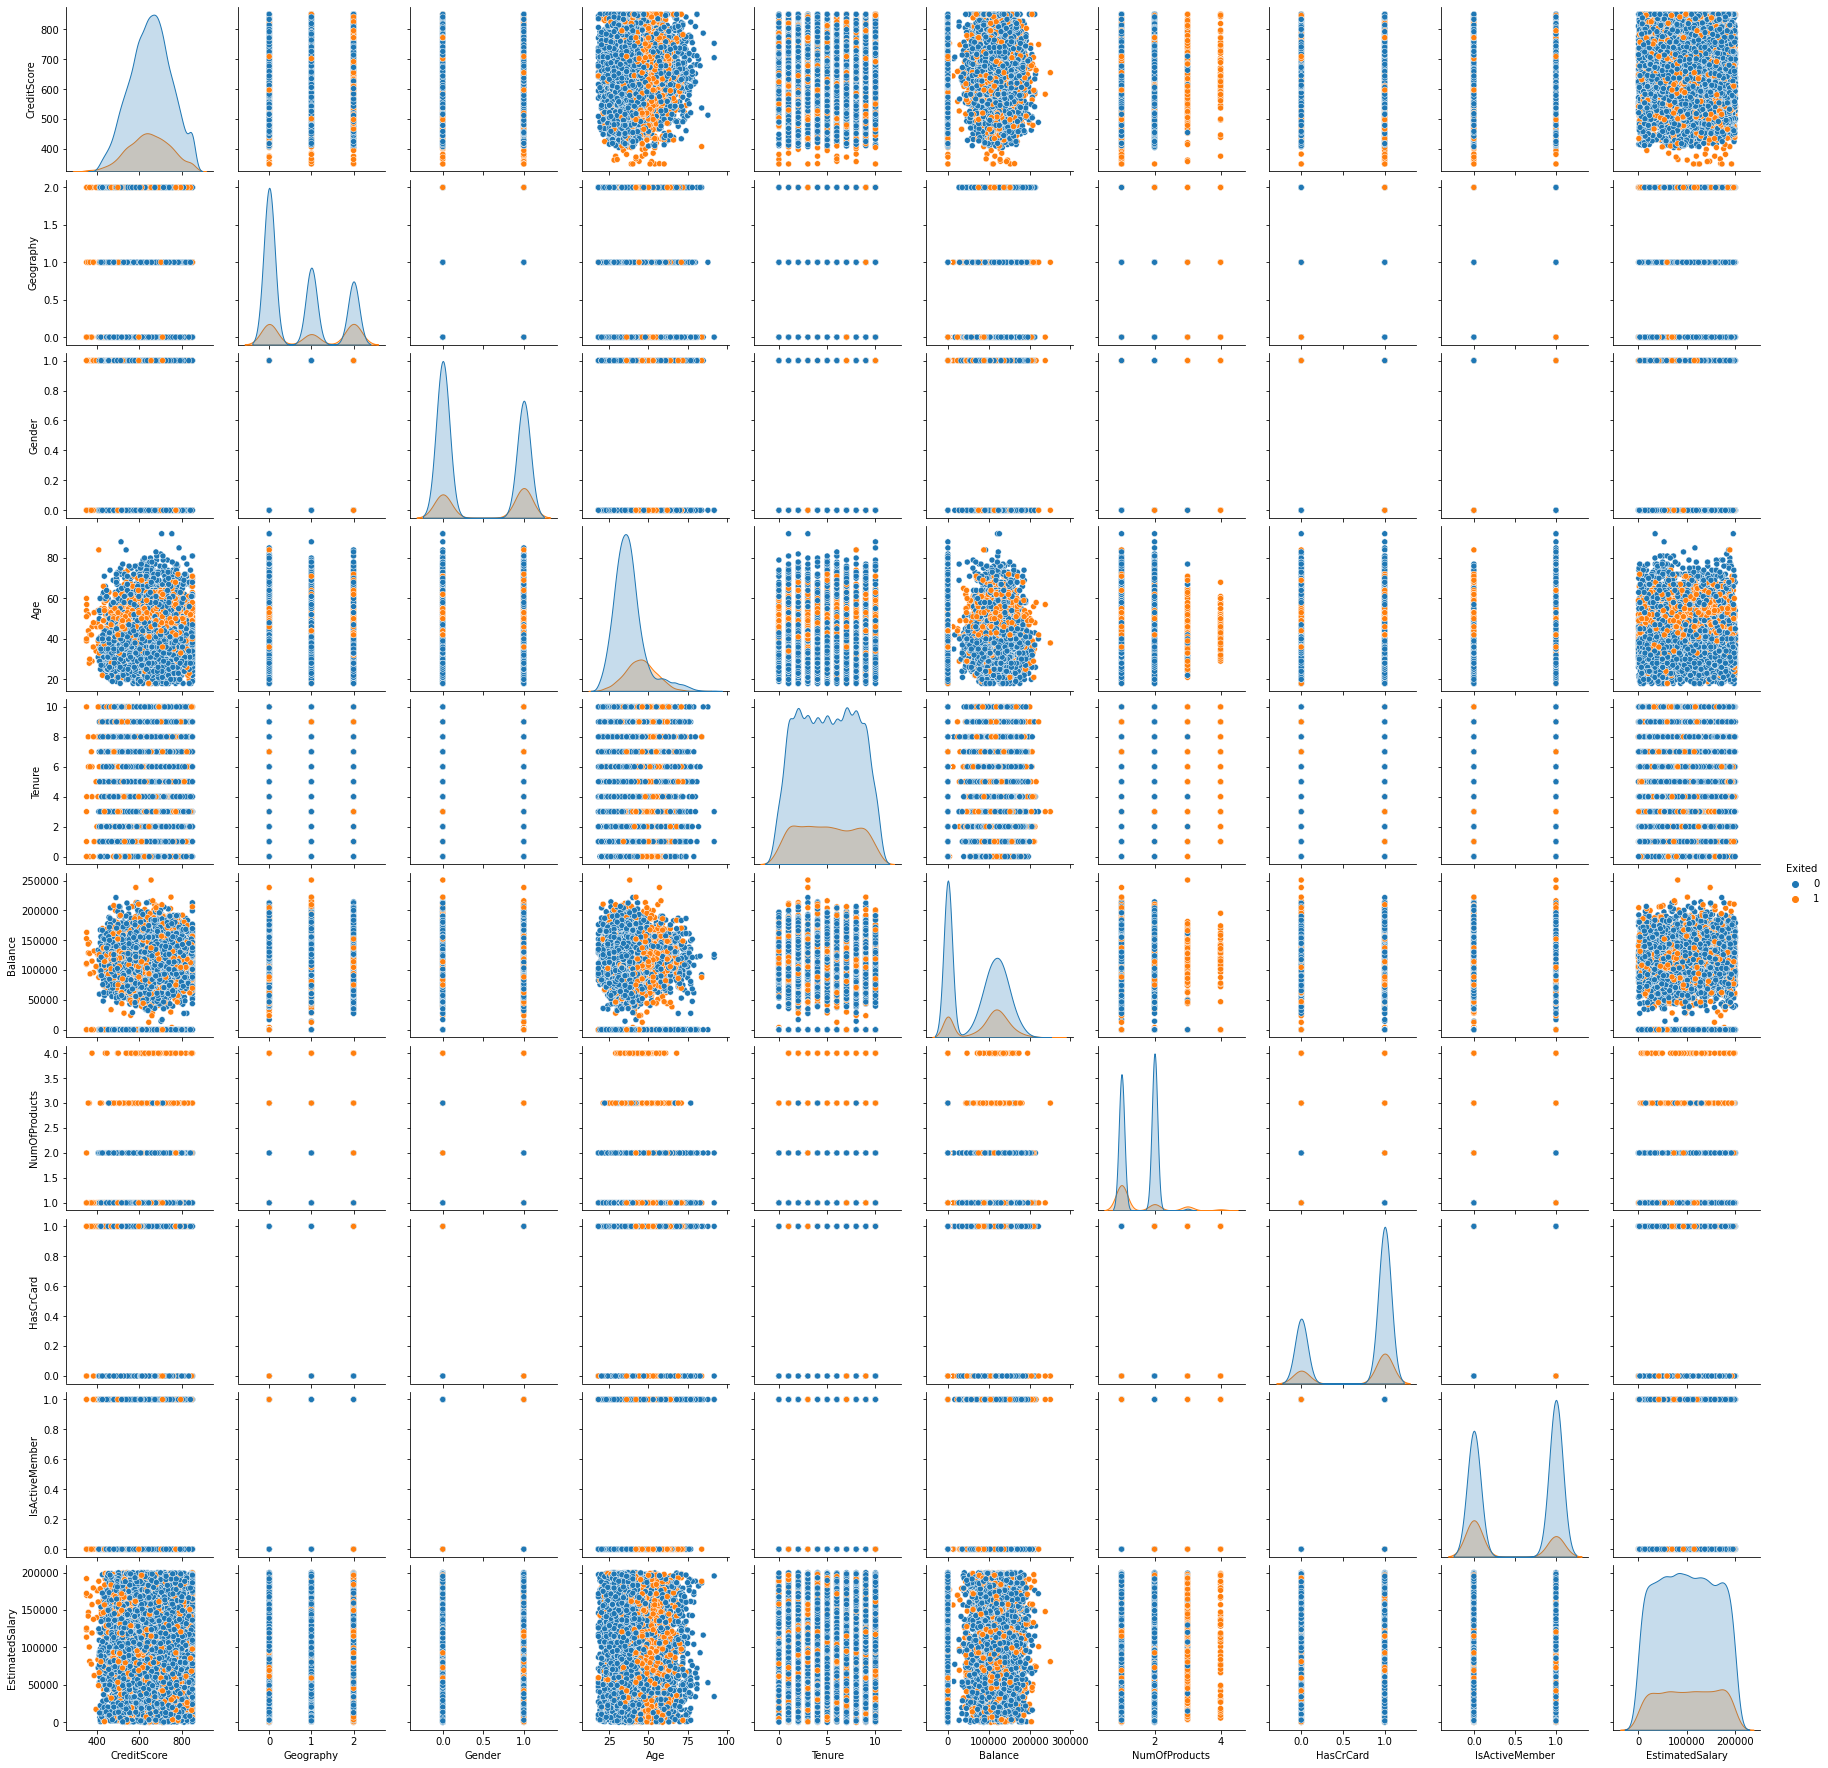

In [19]:
sns.pairplot(df,hue='Exited')

In [20]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [21]:
# # Dividing dependent and independent variables
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [22]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({1: 7963, 0: 7963})


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression  

classifier= LogisticRegression(random_state=0)  
lr_model=classifier.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

acc_score=accuracy_score(y_test, y_pred)   # Accuracy = TP+TN/TP+FP+FN+TN
p_score=precision_score(y_test,y_pred)     # Precision = TP/TP+FP
re_score=recall_score(y_test,y_pred)       # Recall = TP/TP+FN
f_score=f1_score(y_test,y_pred)            #F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print(f'Accuracy score of the model is {acc_score}')
print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

Accuracy score of the model is 0.7606730286288297
precision score of the model is 0.7404358353510896
recall score of the model is 0.7857142857142857
f1_score of the model is 0.7624033906756419


Text(33.0, 0.5, 'Actual Label')

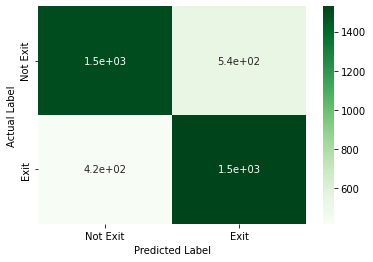

In [27]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [29]:
acc_score=accuracy_score(y_test, y_pred)   # Accuracy = TP+TN/TP+FP+FN+TN
p_score=precision_score(y_test,y_pred)     # Precision = TP/TP+FP
re_score=recall_score(y_test,y_pred)       # Recall = TP/TP+FN
f_score=f1_score(y_test,y_pred)            #F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print(f'Accuracy score of the model is {acc_score}')
print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

Accuracy score of the model is 0.7739829231541939
precision score of the model is 0.75537109375
recall score of the model is 0.7949640287769785
f1_score of the model is 0.7746619929894842


Text(33.0, 0.5, 'Actual Label')

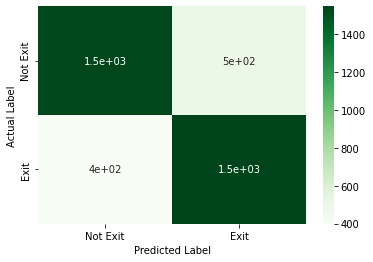

In [30]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn_model=clf.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

In [32]:
acc_score=accuracy_score(y_test, y_pred)   # Accuracy = TP+TN/TP+FP+FN+TN
p_score=precision_score(y_test,y_pred)     # Precision = TP/TP+FP
re_score=recall_score(y_test,y_pred)       # Recall = TP/TP+FN
f_score=f1_score(y_test,y_pred)            #F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print(f'Accuracy score of the model is {acc_score}')
print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

Accuracy score of the model is 0.8041185334003014
precision score of the model is 0.7923771313941825
recall score of the model is 0.8119218910585817
f1_score of the model is 0.8020304568527918


Text(33.0, 0.5, 'Actual Label')

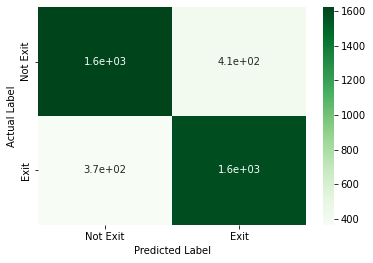

In [33]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [35]:
acc_score=accuracy_score(y_test, y_pred)   # Accuracy = TP+TN/TP+FP+FN+TN
p_score=precision_score(y_test,y_pred)     # Precision = TP/TP+FP
re_score=recall_score(y_test,y_pred)       # Recall = TP/TP+FN
f_score=f1_score(y_test,y_pred)            #F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print(f'Accuracy score of the model is {acc_score}')
print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

Accuracy score of the model is 0.8578603716725264
precision score of the model is 0.8481331987891019
recall score of the model is 0.8638232271325796
f1_score of the model is 0.8559063136456211


In [36]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[1735,  301],
       [ 265, 1681]], dtype=int64)

Text(33.0, 0.5, 'Actual Label')

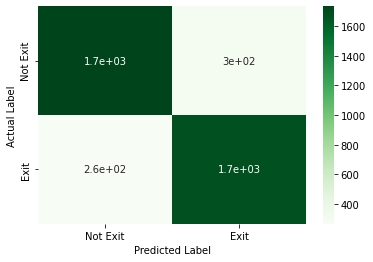

In [37]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Saving Model

In [38]:
import pickle
pickle.dump(rf_model, open('pickle.pkl','wb'))

In [39]:
# Loading model to compare the results

model = pickle.load(open('pickle.pkl','rb'))
print(rf_model.predict([[432, 1, 0, 34, 3, 44440,2 , 1, 0,50000]]))

[1]
